# Convolutional Neural Networks for Visual Recognition

## Table of Contents:

- Generating some data
    - Training a Softmax Linear Classifier
    - Initialize the parameters
    - Compute the class scores
    - Compute the loss
    - Computing the analytic gradient with backpropagation
    - Performing a parameter update
    - Putting it all together: Training a Softmax Classifier
- Training a Neural Network
- Summary

In this section we’ll walk through a complete implementation of a toy Neural Network in 2 dimensions. We’ll first implement a simple linear classifier and then extend the code to a 2-layer Neural Network. As we’ll see, this extension is surprisingly simple and very few changes are necessary.

In [4]:
import numpy as np
import matplotlib.pyplot as plt

## Generating some data
Lets generate a classification dataset that is not easily linearly separable. Our favorite example is the spiral dataset, which can be generated as follows:

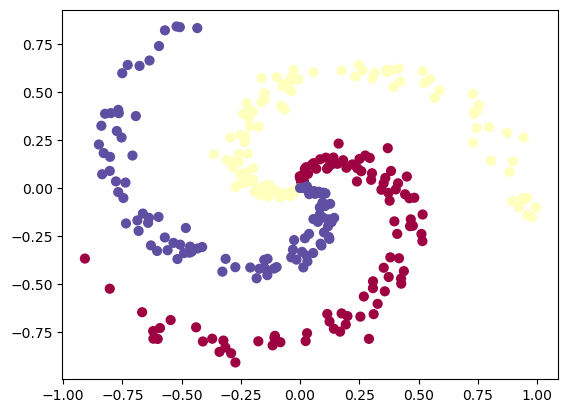

In [5]:
N = 100 # number of points per class
D = 2 # dimensionality
K = 3 # number of classes
X = np.zeros((N * K, D)) # data matrix (each row = single example)
y = np.zeros(N * K, dtype='uint8') # class labels

for j in range(K):
  ix = range(N * j, N * (j + 1))
  r = np.linspace(0.0, 1, N) # radius
  t = np.linspace(j * 4,(j + 1) * 4, N) + np.random.randn(N) * 0.2 # theta
  X[ix] = np.c_[r * np.sin(t), r * np.cos(t)]
  y[ix] = j

# lets visualize the data:
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.show()

Normally we would want to preprocess the dataset so that each feature has zero mean and unit standard deviation, but in this case the features are already in a nice range from -1 to 1, so we skip this step.

# Training a Softmax Linear Classifier
## Initialize the parameters
Lets first train a Softmax classifier on this classification dataset. As we saw in the previous sections, the Softmax classifier has a linear score function and uses the cross-entropy loss. The parameters of the linear classifier consist of a weight matrix W and a bias vector b for each class. Lets first initialize these parameters to be random numbers:

In [9]:
# initialize parameters randomly
W = 0.01 * np.random.randn(D, K)
b = np.zeros((1, K))

Recall that we D = 2 is the dimensionality and K = 3 is the number of classes.

## Compute the class scores
Since this is a linear classifier, we can compute all class scores very simply in parallel with a single matrix multiplication:

In [10]:
# compute class scores for a linear classifier
scores = np.dot(X, W) + b

In this example we have 300 2-D points, so after this multiplication the array scores will have size [300 x 3], where each row gives the class scores corresponding to the 3 classes (blue, red, yellow).

## Compute the loss
The second key ingredient we need is a loss function, which is a differentiable objective that quantifies our unhappiness with the computed class scores. Intuitively, we want the correct class to have a higher score than the other classes. When this is the case, the loss should be low and otherwise the loss should be high. There are many ways to quantify this intuition, but in this example lets use the cross-entropy loss that is associated with the Softmax classifier. Recall that if f is the array of class scores for a single example (e.g. array of 3 numbers here), then the Softmax classifier computes the loss for that example as:

https://cs231n.github.io/neural-networks-case-study/